In [17]:
import pandas as pd

df = pd.read_csv(r'G:\Users\Clamfighter\Documents\GitHub\Football-Analytics\Data\football_data.csv', low_memory=False)

In [18]:
columns_to_keep = [
    "Div", "Date", "Time", "HomeTeam", "AwayTeam",
    "FTHG", "HG", "FTAG", "AG", "FTR", "Res",
    "HTHG", "HTAG", "HTR",
    "Attendance", "Referee",
    "HS", "AS", "HST", "AST", "HHW", "AHW", "HC", "AC",
    "HF", "AF", "HFKC", "AFKC", "HO", "AO",
    "HY", "AY", "HR", "AR", "HBP", "ABP"
]

# Filter columns that actually exist in your DataFrame
columns_in_df = [col for col in columns_to_keep if col in df.columns]

# Filter the DataFrame
df = df[columns_in_df]


In [19]:
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,HG,FTAG,AG,FTR,...,HFKC,AFKC,HO,AO,HY,AY,HR,AR,HBP,ABP
0,E0,11/08/2023,20:00,Burnley,Man City,0.0,NaN,3.0,NaN,A,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,NaN,NaN
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2.0,NaN,1.0,NaN,H,...,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,NaN,NaN
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1.0,NaN,1.0,NaN,D,...,NaN,NaN,NaN,NaN,1.0,4.0,0.0,0.0,NaN,NaN
3,E0,12/08/2023,15:00,Brighton,Luton,4.0,NaN,1.0,NaN,H,...,NaN,NaN,NaN,NaN,2.0,2.0,0.0,0.0,NaN,NaN
4,E0,12/08/2023,15:00,Everton,Fulham,0.0,NaN,1.0,NaN,A,...,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55678,NaN,25/03/2025,19:45,Altrincham,Solihull,1.0,NaN,1.0,NaN,D,...,NaN,NaN,NaN,NaN,3.0,3.0,1.0,0.0,NaN,NaN
55679,NaN,25/03/2025,19:45,Boston Utd,Southend,3.0,NaN,0.0,NaN,H,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,NaN,NaN
55680,NaN,25/03/2025,19:45,Rochdale,York,0.0,NaN,4.0,NaN,A,...,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0,NaN,NaN
55681,NaN,25/03/2025,19:45,Wealdstone,Aldershot,1.0,NaN,3.0,NaN,A,...,NaN,NaN,NaN,NaN,3.0,3.0,0.0,0.0,NaN,NaN


In [20]:
import pandas as pd

# Shared match-level columns
shared_cols = ['Div', 'Date', 'Time', 'Referee', 'Attendance', 'HTR', 'FTR']

# Actual column names only
home_stat_cols = {
    'Team': 'HomeTeam',
    'Opponent': 'AwayTeam',
    'Goals': 'FTHG',
    'GoalsConceded': 'FTAG',
    'HTGoals': 'HTHG',
    'HTGoalsConceded': 'HTAG',
    'Shots': 'HS',
    'ShotsOnTarget': 'HST',
    'HitWoodwork': 'HHW',
    'Corners': 'HC',
    'Fouls': 'HF',
    'FreeKicksConceded': 'HFKC',
    'Offsides': 'HO',
    'YellowCards': 'HY',
    'RedCards': 'HR',
    'BookingPoints': 'HBP'
}

away_stat_cols = {
    'Team': 'AwayTeam',
    'Opponent': 'HomeTeam',
    'Goals': 'FTAG',
    'GoalsConceded': 'FTHG',
    'HTGoals': 'HTAG',
    'HTGoalsConceded': 'HTHG',
    'Shots': 'AS',
    'ShotsOnTarget': 'AST',
    'HitWoodwork': 'AHW',
    'Corners': 'AC',
    'Fouls': 'AF',
    'FreeKicksConceded': 'AFKC',
    'Offsides': 'AO',
    'YellowCards': 'AY',
    'RedCards': 'AR',
    'BookingPoints': 'ABP'
}

# Extract only real column names from mappings
home_df = df[shared_cols + list(home_stat_cols.values())].copy()
home_df.columns = shared_cols + list(home_stat_cols.keys())
home_df["IsHome"] = True

away_df = df[shared_cols + list(away_stat_cols.values())].copy()
away_df.columns = shared_cols + list(away_stat_cols.keys())
away_df["IsHome"] = False

# Combine both
team_df = pd.concat([home_df, away_df], ignore_index=True)

# Convert date
team_df['Date'] = pd.to_datetime(team_df['Date'], dayfirst=True, errors='coerce')
team_df = team_df.sort_values('Date').reset_index(drop=True)

print(team_df.head())
print(f"\n✅ Transformed {df.shape[0]} matches → {team_df.shape[0]} team-rows")


  Div       Date Time        Referee  Attendance HTR FTR       Team  \
0  E2 2000-08-12  NaN     Alan Wiley      3654.0   A   A       Bury   
1  E1 2000-08-12  NaN  Phil Richards     15614.0   D   H   Barnsley   
2  E3 2000-08-12  NaN   Brian Curson      4051.0   D   D  Mansfield   
3  E3 2000-08-12  NaN  M Clattenburg      4745.0   A   H       York   
4  E3 2000-08-12  NaN  Trevor Parkes      3929.0   A   A    Cardiff   

       Opponent  Goals  ...  ShotsOnTarget  HitWoodwork  Corners  Fouls  \
0     Cambridge    1.0  ...            7.0          0.0      7.0   16.0   
1       Norwich    1.0  ...            4.0          1.0      1.0    8.0   
2    Cheltenham    2.0  ...            2.0          0.0      1.0    7.0   
3  Chesterfield    1.0  ...            3.0          0.0      1.0   12.0   
4        Exeter    2.0  ...            7.0          0.0     11.0   10.0   

   FreeKicksConceded  Offsides  YellowCards  RedCards  BookingPoints  IsHome  
0                NaN       2.0          1.0

Explore Target Feature: Goals Scored

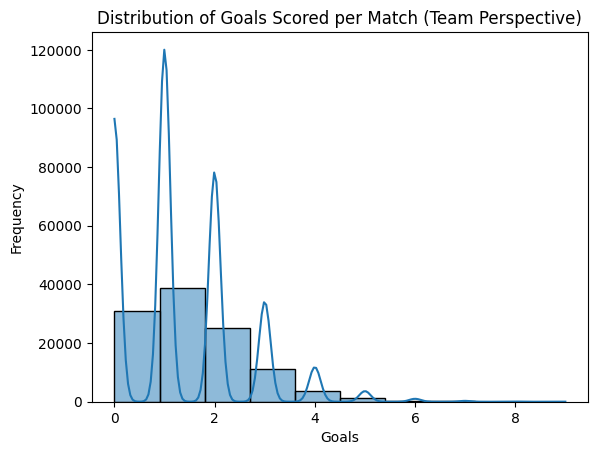

count    111332.000000
mean          1.310935
std           1.180221
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           9.000000
Name: Goals, dtype: float64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(team_df['Goals'], bins=10, kde=True)
plt.title("Distribution of Goals Scored per Match (Team Perspective)")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()

print(team_df['Goals'].describe())


Feature Correlation Check

In [22]:
numeric_cols = team_df.select_dtypes(include='number').drop(columns='Goals')
corrs = team_df[numeric_cols.columns.tolist() + ['Goals']].corr()['Goals'].sort_values(ascending=False)

print("Top features correlated with goals scored:\n")
print(corrs.drop('Goals'))


Top features correlated with goals scored:

HTGoals              0.680674
ShotsOnTarget        0.454198
Shots                0.283202
HitWoodwork          0.070844
Offsides             0.065437
Corners              0.030046
Attendance           0.016349
HTGoalsConceded     -0.028175
Fouls               -0.033004
GoalsConceded       -0.047897
YellowCards         -0.049317
RedCards            -0.073564
BookingPoints       -0.108410
FreeKicksConceded         NaN
Name: Goals, dtype: float64


Feature Selection

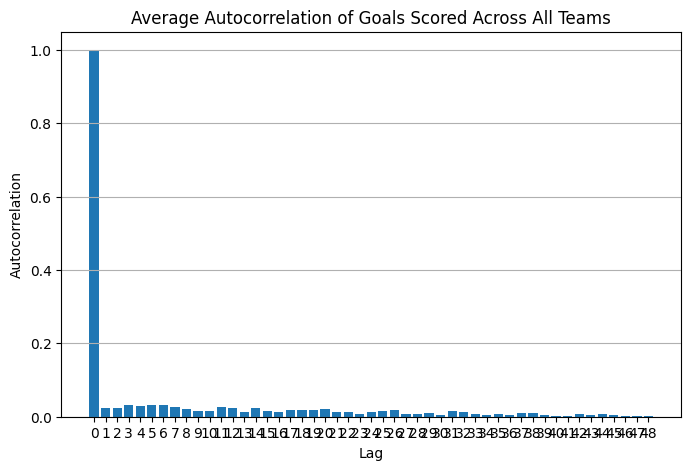

In [23]:
import numpy as np
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

# Parameters
max_lag = 48
teams = team_df['Team'].unique()
acf_matrix = []

# Loop through teams and compute ACF for each
for team in teams:
    goals = team_df[team_df['Team'] == team]['Goals'].dropna()
    if len(goals) > max_lag:
        team_acf = acf(goals, nlags=max_lag, fft=False)
        acf_matrix.append(team_acf)

# Average ACF across all teams
acf_array = np.array(acf_matrix)
avg_acf = np.mean(acf_array, axis=0)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(range(len(avg_acf)), avg_acf)
plt.title("Average Autocorrelation of Goals Scored Across All Teams")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.xticks(range(len(avg_acf)))
plt.grid(axis='y')
plt.show()


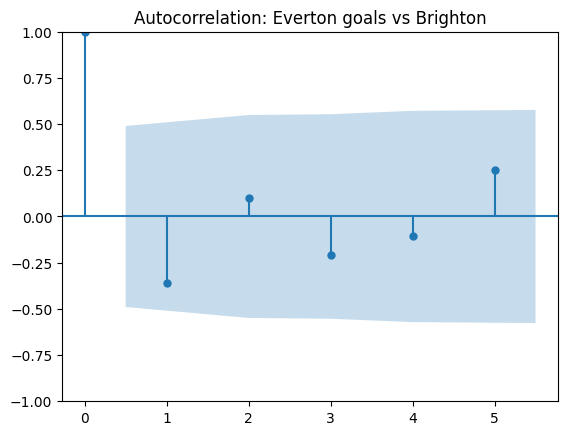

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Example: Arsenal vs Chelsea
team = "Everton"
opponent = "Brighton"

subset = team_df[
    (team_df["Team"] == team) &
    (team_df["Opponent"] == opponent)
].sort_values("Date")

plot_acf(subset["Goals"], lags=5)
plt.title(f"Autocorrelation: {team} goals vs {opponent}")
plt.show()


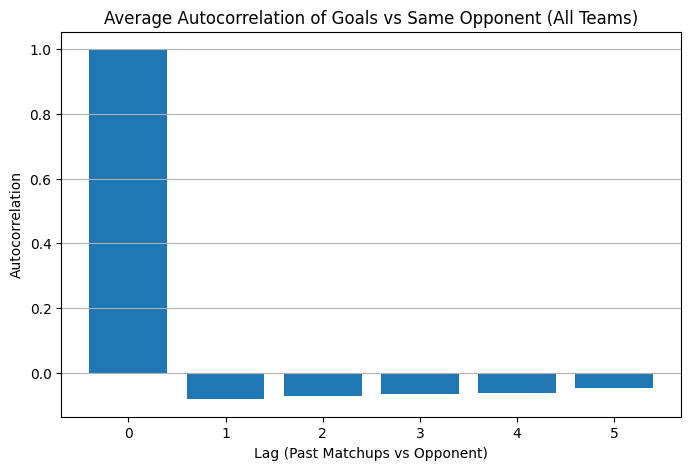

In [25]:
from statsmodels.tsa.stattools import acf
import numpy as np

max_lag = 5
pairwise_acfs = []

for team in team_df['Team'].unique():
    opps = team_df[team_df['Team'] == team]['Opponent'].unique()
    for opp in opps:
        matchups = team_df[
            (team_df['Team'] == team) &
            (team_df['Opponent'] == opp)
        ].sort_values('Date')

        goals = matchups['Goals'].dropna()

        if len(goals) > max_lag:
            if goals.var() == 0:
                # All values same (e.g. all zeros) — treat as perfect consistency
                # Set autocorrelation to 1.0 at all lags (or 0.0 after lag 0 if you prefer)
                fake_acf = np.ones(max_lag + 1)
                pairwise_acfs.append(fake_acf)
            else:
                try:
                    acf_vals = acf(goals, nlags=max_lag, fft=False)
                    pairwise_acfs.append(acf_vals)
                except:
                    pass


# Average across all team-opponent pairs
acf_array = np.array(pairwise_acfs)
avg_acf = np.mean(acf_array, axis=0)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(range(len(avg_acf)), avg_acf)
plt.title("Average Autocorrelation of Goals vs Same Opponent (All Teams)")
plt.xlabel("Lag (Past Matchups vs Opponent)")
plt.ylabel("Autocorrelation")
plt.grid(axis='y')
plt.show()


Yellow / Red Card analysis

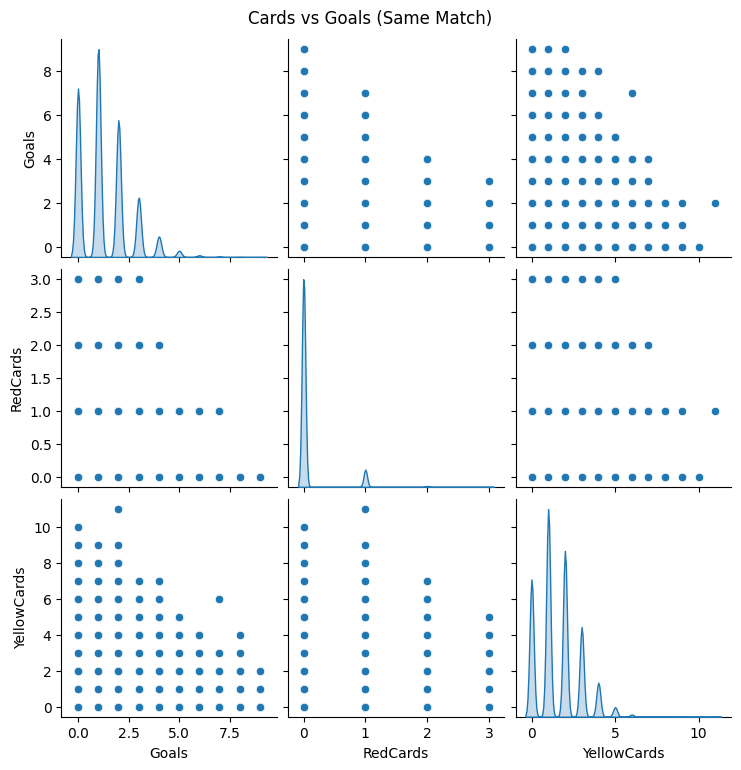

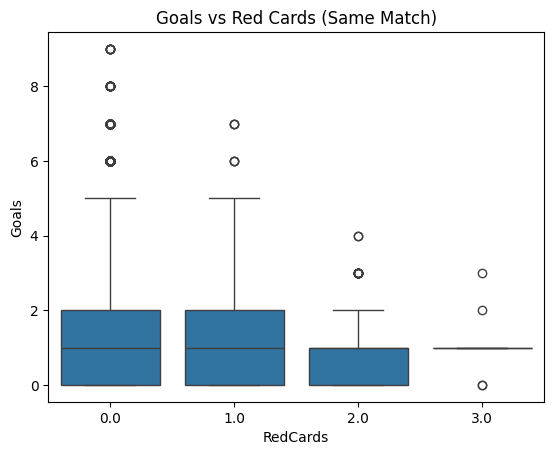

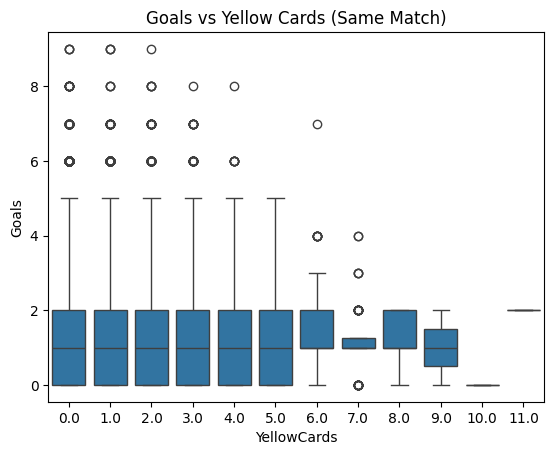

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset for non-null values
subset = team_df[['Goals', 'RedCards', 'YellowCards']].dropna()

# Pairplot (scatter + KDE)
sns.pairplot(subset, diag_kind='kde')
plt.suptitle("Cards vs Goals (Same Match)", y=1.02)
plt.show()

# Boxplot: Red Cards vs Goals
sns.boxplot(data=subset, x='RedCards', y='Goals')
plt.title("Goals vs Red Cards (Same Match)")
plt.show()

# Boxplot: Yellow Cards vs Goals
sns.boxplot(data=subset, x='YellowCards', y='Goals')
plt.title("Goals vs Yellow Cards (Same Match)")
plt.show()


In [27]:
def add_card_lag_features(df, lags=[1, 2, 3]):
    df = df.sort_values(['Team', 'Date'])
    for lag in lags:
        df[f'RedCards_lag{lag}'] = df.groupby('Team')['RedCards'].shift(lag)
        df[f'YellowCards_lag{lag}'] = df.groupby('Team')['YellowCards'].shift(lag)
    return df
team_df = add_card_lag_features(team_df)


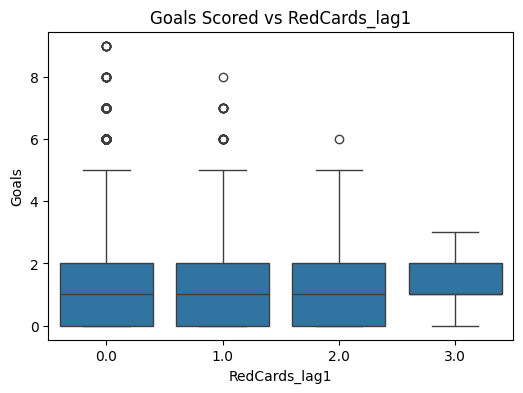

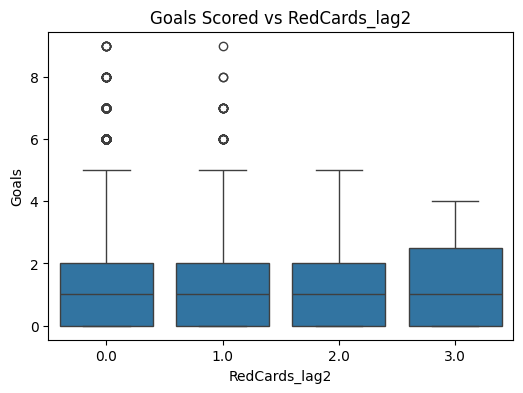

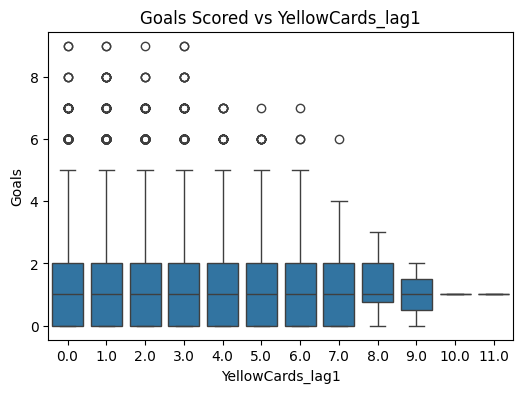

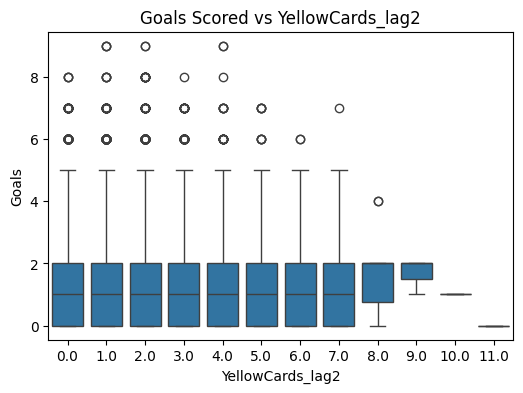

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose which lag features to visualize
card_lag_cols = ['RedCards_lag1', 'RedCards_lag2', 'YellowCards_lag1', 'YellowCards_lag2']

for col in card_lag_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=team_df, x=col, y='Goals')
    plt.title(f"Goals Scored vs {col}")
    plt.show()



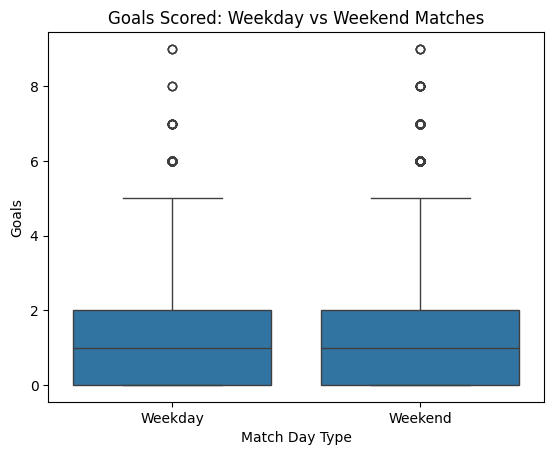

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure it's created
team_df['IsWeekendMatch'] = team_df['Date'].dt.weekday >= 5
team_df['IsWeekendMatch'] = team_df['IsWeekendMatch'].astype(int)

sns.boxplot(data=team_df, x='IsWeekendMatch', y='Goals')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Goals Scored: Weekday vs Weekend Matches")
plt.ylabel("Goals")
plt.xlabel("Match Day Type")
plt.show()


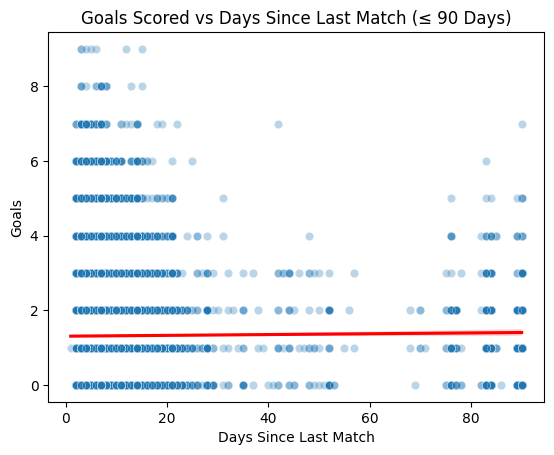

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure match order and calculate days since last match
team_df = team_df.sort_values(['Team', 'Date'])
team_df['DaysSinceLastMatch'] = team_df.groupby('Team')['Date'].diff().dt.days

# Filter out long gaps (> 90 days)
filtered_df = team_df[team_df['DaysSinceLastMatch'] <= 90]

# Plot
sns.scatterplot(data=filtered_df, x='DaysSinceLastMatch', y='Goals', alpha=0.3)
sns.regplot(data=filtered_df, x='DaysSinceLastMatch', y='Goals', scatter=False, color='red')
plt.title("Goals Scored vs Days Since Last Match (≤ 90 Days)")
plt.xlabel("Days Since Last Match")
plt.ylabel("Goals")
plt.show()



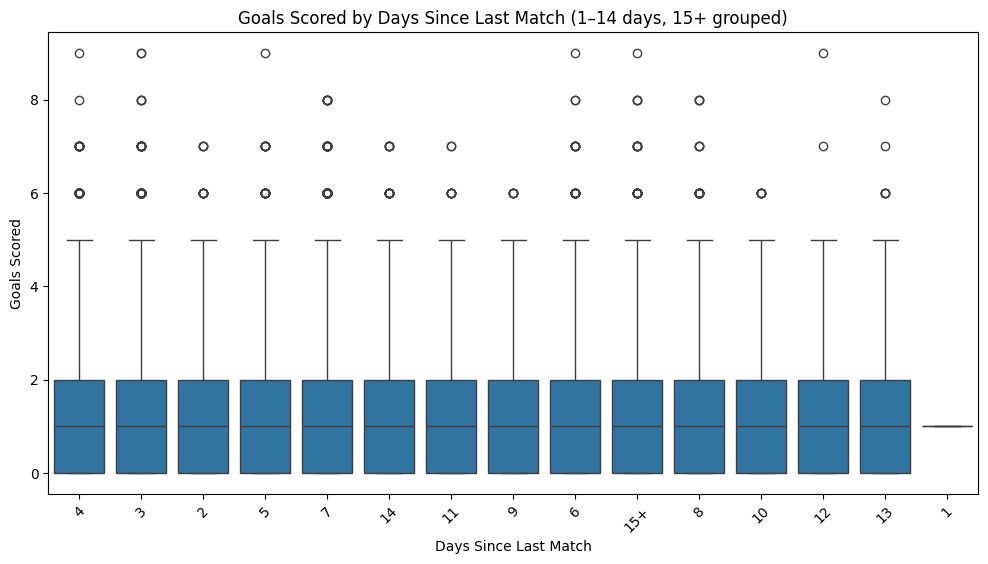

In [35]:
team_df = team_df.sort_values(['Team', 'Date'])
team_df['DaysSinceLastMatch'] = team_df.groupby('Team')['Date'].diff().dt.days

# Bucket values: keep 1–14 as-is, group 15+ as "15+"
team_df['DaysBucket'] = team_df['DaysSinceLastMatch'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and x <= 14 else ('15+' if pd.notnull(x) else None)
)
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out nulls
filtered = team_df.dropna(subset=['DaysBucket', 'Goals'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered, x='DaysBucket', y='Goals')
plt.title("Goals Scored by Days Since Last Match (1–14 days, 15+ grouped)")
plt.xlabel("Days Since Last Match")
plt.ylabel("Goals Scored")
plt.xticks(rotation=45)
plt.show()

In [40]:
goalsbynumgames = (
    filtered.groupby(['Div', 'DaysBucket'])
    .agg(
        Games=('Goals', 'count'),
        TotalGoals=('Goals', 'sum'),
        AvgGoals=('Goals', 'mean')
    )
    .reset_index()
    .sort_values(by=['Div', 'DaysBucket'])
)

goalsbynumgames


,Div,DaysBucket,Games,TotalGoals,AvgGoals
0,E0,10,387,521.0,1.346253
1,E0,11,390,561.0,1.438462
2,E0,12,159,179.0,1.125786
3,E0,13,491,758.0,1.543788
4,E0,14,1015,1351.0,1.331034
...,...,...,...,...,...
66,EC,5,1140,1641.0,1.439474
67,EC,6,569,814.0,1.430580
68,EC,7,4632,6174.0,1.332902
69,EC,8,180,247.0,1.372222


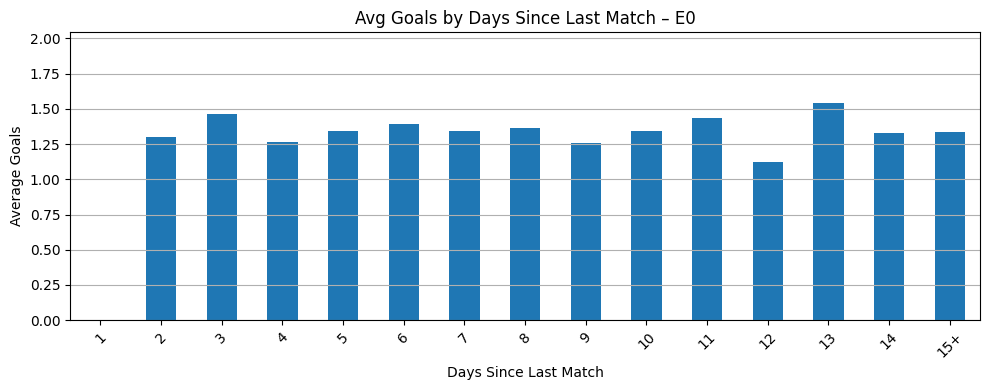

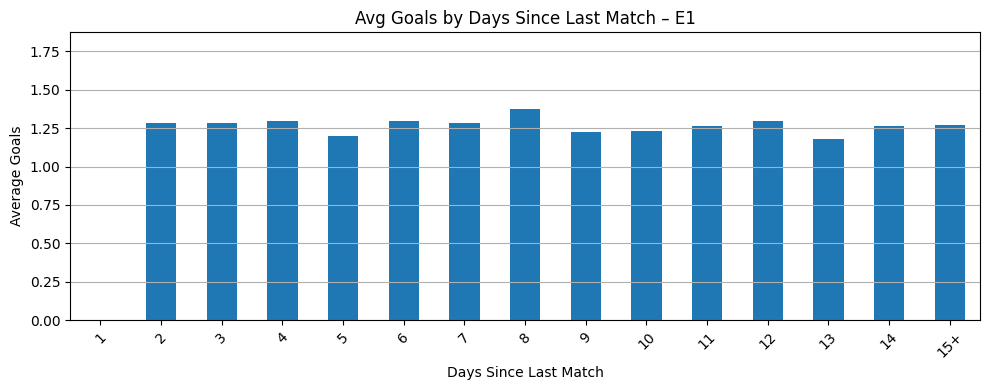

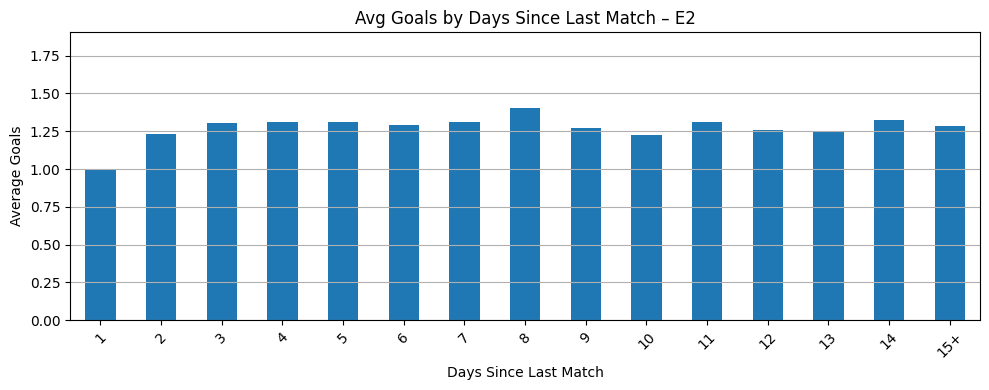

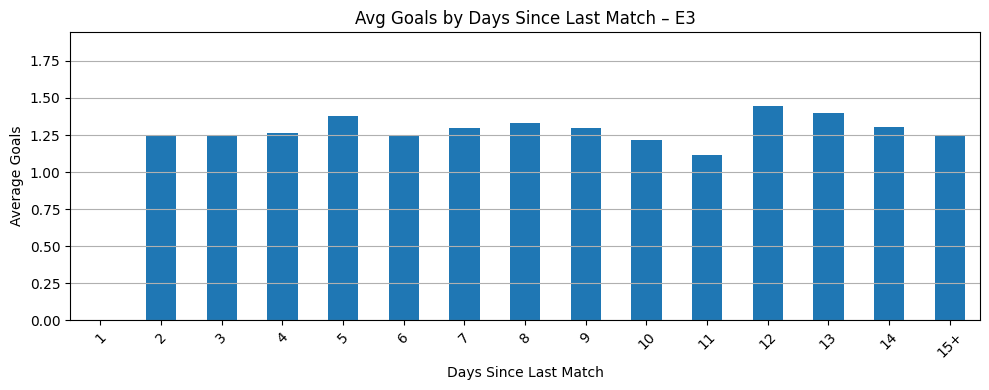

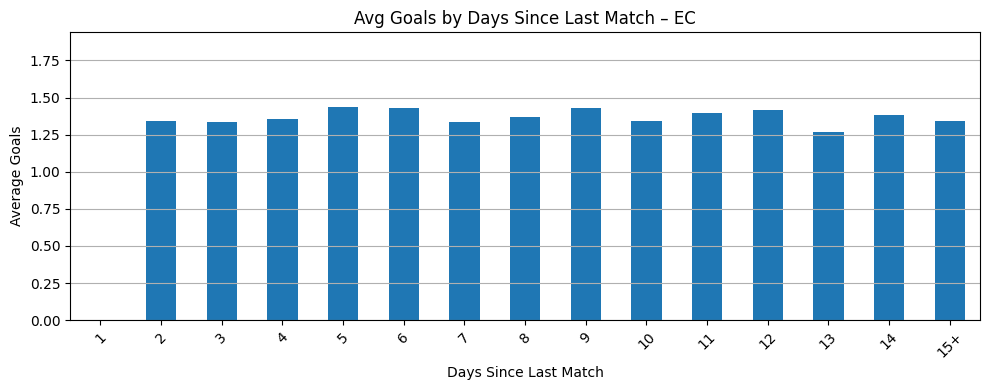

In [42]:
import matplotlib.pyplot as plt

# Get unique divisions
divisions = goalsbynumgames['Div'].unique()

for div in divisions:
    div_data = (
        filtered[filtered['Div'] == div]
        .groupby('DaysBucket')['Goals']
        .mean()
        .reindex([str(i) for i in range(1, 15)] + ['15+'])  # Ensure correct order
    )

    # Skip if all values are NaN
    if div_data.dropna().empty:
        continue

    plt.figure(figsize=(10, 4))
    div_data.plot(kind='bar')
    plt.title(f'Avg Goals by Days Since Last Match – {div}')
    plt.xlabel('Days Since Last Match')
    plt.ylabel('Average Goals')
    plt.xticks(rotation=45)
    plt.ylim(0, div_data.dropna().max() + 0.5)  # avoid NaN max
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



              Games  AvgGoals    StdDev
FatigueGroup                           
<5 Days       46522  1.302674  1.174442
5–8 Days      48146  1.320484  1.183672
9+ Days       16502  1.307963  1.186784


C:\Users\Jack\AppData\Local\Temp\ipykernel_3056\3808553819.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_grouped.groupby('FatigueGroup')['Goals']


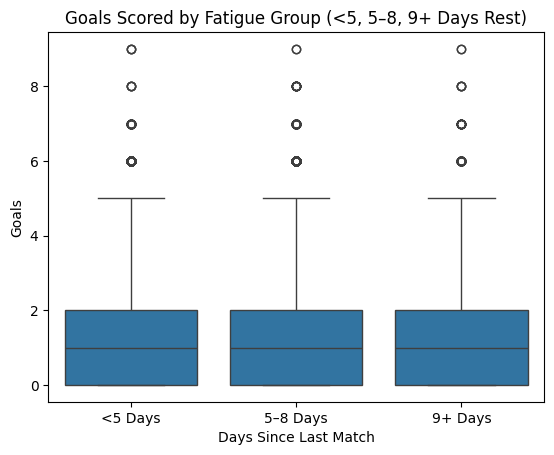

In [45]:
team_df['FatigueGroup'] = pd.cut(
    team_df['DaysSinceLastMatch'],
    bins=[0, 4, 8, float('inf')],
    labels=['<5 Days', '5–8 Days', '9+ Days']
)

filtered_grouped = team_df.dropna(subset=['FatigueGroup', 'Goals'])
summary = (
    filtered_grouped.groupby('FatigueGroup')['Goals']
    .agg(['count', 'mean', 'std'])
    .rename(columns={'count': 'Games', 'mean': 'AvgGoals', 'std': 'StdDev'})
)

print(summary)

sns.boxplot(data=filtered_grouped, x='FatigueGroup', y='Goals')
plt.title("Goals Scored by Fatigue Group (<5, 5–8, 9+ Days Rest)")
plt.xlabel("Days Since Last Match")
plt.ylabel("Goals")
plt.show()


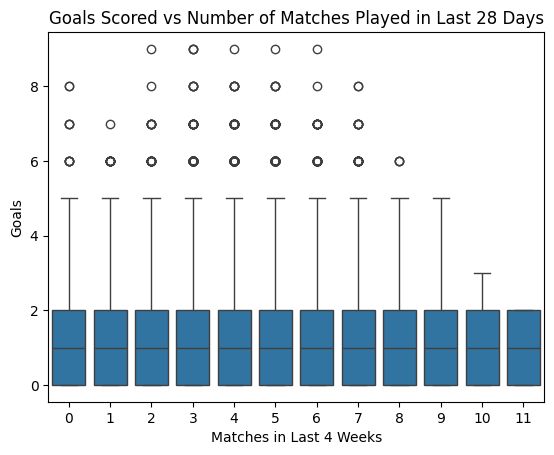

In [38]:
from pandas.tseries.offsets import Day

def add_matches_last_28_days(df):
    df = df.sort_values(['Team', 'Date']).copy()
    df['MatchesLast28Days'] = 0

    # Loop over each team
    for team in df['Team'].unique():
        team_matches = df[df['Team'] == team]

        # Iterate by row index
        for i, row in team_matches.iterrows():
            current_date = row['Date']
            past_window_start = current_date - Day(28)

            # Count past matches within 28 days (excluding the current match)
            mask = (team_matches['Date'] < current_date) & (team_matches['Date'] >= past_window_start)
            match_count = team_matches[mask].shape[0]

            df.at[i, 'MatchesLast28Days'] = match_count

    return df
team_df = add_matches_last_28_days(team_df)
sns.boxplot(data=team_df, x='MatchesLast28Days', y='Goals')
plt.title("Goals Scored vs Number of Matches Played in Last 28 Days")
plt.xlabel("Matches in Last 4 Weeks")
plt.ylabel("Goals")
plt.show()

C:\Users\Jack\AppData\Local\Temp\ipykernel_3056\2326683018.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  team_df['KickoffHour'] = pd.to_datetime(team_df['Time'], errors='coerce').dt.hour


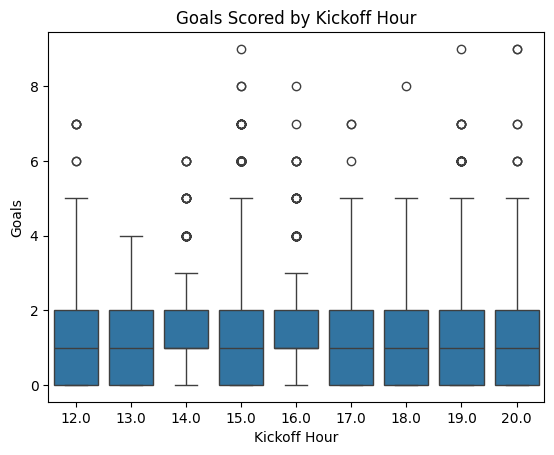

In [33]:
team_df['KickoffHour'] = pd.to_datetime(team_df['Time'], errors='coerce').dt.hour

sns.boxplot(data=team_df.dropna(subset=['KickoffHour']), x='KickoffHour', y='Goals')
plt.title("Goals Scored by Kickoff Hour")
plt.xlabel("Kickoff Hour")
plt.ylabel("Goals")
plt.show()

In [46]:
team_df['ShotConversionRate'] = team_df.apply(
    lambda x: x['Goals'] / x['Shots'] if x['Shots'] > 0 else None,
    axis=1
)
team_df['ShotsPerGoal'] = team_df.apply(
    lambda x: x['Shots'] / x['Goals'] if x['Goals'] > 0 else None,
    axis=1
)
team_df = team_df.sort_values(['Team', 'Date'])
team_df['ShotConversionRolling5'] = (
    team_df.groupby('Team')['ShotConversionRate']
    .shift(1)
    .rolling(5)
    .mean()
    .reset_index(0, drop=True)
)


team_df['xG_proxy'] = team_df['Shots'] * team_df['ShotConversionRolling5']

team_df = team_df.sort_values(['Team', 'Date'])
team_df['ShotConversionRolling5'] = (
    team_df.groupby('Team')['ShotConversionRate']
    .shift(1)
    .rolling(5)
    .mean()
    .reset_index(0, drop=True)
)

team_df['xG_proxy'] = team_df['Shots'] * team_df['ShotConversionRolling5']

In [47]:
team_df['ShotAccuracy'] = team_df.apply(
    lambda x: x['ShotsOnTarget'] / x['Shots'] if x['Shots'] > 0 else None,
    axis=1
)
